
# <center> Markowitz Portfolio Theory and Python</center> 
## Modeling the stock portfolio performance and evaluation

**Elimination of illiteracy (likbez)**:

* A **portfolio** is a collection of financial investments like stocks, bonds, commodities, cash, and cash equivalents, including closed-end funds and exchange-traded funds (ETFs). People generally believe that stocks, bonds, and cash comprise the core of a portfolio.

One of the key concepts in portfolio management is the diversification in order to reduce risk.  It aims to maximize returns by investing in different areas that would each react differently to the same event.

* **Modern portfolio theory (MPT)** is a theory on how risk-averse investors can construct portfolios to maximize expected return based on a given level of market risk. 

### Why it's interesting?

Most of people assume "higher risk = higher reward" when it comes to investing. That is typically the case when looking at investing through the paradigm of individual stocks only. If you take into consideration the correlation coefficient between stocks, it's actually possible to receive a higher return and an equal (or lower) risk through diversification.

# Markowitz Portfolio Theory Application

Harry Markowitz, 'Portfolio Selection', 1952. 

Modern portfolio theory is very useful for investors trying to construct efficient portfolios.

1. Valuing the securities that might be included in the portfolio. 
2. Calculating the desired asset allocation (or a mix of assets).
3. Performing calculations to optimize the portfolio to get the maximum amount of return for the minimum amount of risk.
4. Using financial analysis to monitor the portfolio to see if it meets expectations, and then making changes to the individual securities or asset mix when market conditions warrant a change.

However, investors who are more concerned with downside risk than variance might prefer post-modern portfolio theory (PMPT) to MPT.

Based on statistical measures such as variance and correlation, an individual investment's performance is less important than how it impacts the entire portfolio.

MPT assumes that investors are risk-averse, meaning they prefer a less risky portfolio to a riskier one for a given level of return. 

**Assumptions**:

1. Investors attempt to maximize returns given their unique situation.<br>
2. Asset returns are normally distributed.<br>
3. Investors are rational and avoid unnecessary risk.<br>
4. All investors have access to the same information.<br>
5. Investors have the same views on expected returns.<br>
6. Taxes and trading costs are not considered.<br>
7. Single investors are not sizable enough to influence market prices.<br>
8. Unlimited amounts of capital can be borrowed at the risk-free rate.<br>

Some of these assumptions may never hold, yet MPT is still very useful.

In [1]:
asset_1_investments = 800000
asset_2_investments = 200000
expected_return_asset_1 = 5 # percent of the total sum
expected_return_asset_2 = 10 # percent of the total sum

In [2]:
# What is the total investment amount?
total = asset_1_investments + asset_2_investments #YOUR CODE HERE
total

1000000

In [3]:
# What is the expected return on asset 1? (in percent)
asset_1_investments / total * expected_return_asset_1

4.0

In [4]:
# In money?
asset_1_investments * 4 / 100

32000.0

The expected return of the portfolio is calculated as a weighted sum of the individual assets' returns. If a portfolio contained two equally weighted assets with expected returns of 5 and 10%, the portfolio's expected return would be:

In [5]:
# What is the portfolio expected return? (in percent)
portfolio_expected_return = (asset_1_investments / total * expected_return_asset_1) + \
(asset_2_investments / total * expected_return_asset_2)

In [6]:
portfolio_expected_return

6.0

$\text{Portfolio expected return} = \frac{\$800,000}{\$1,000,000} \cdot 5\% + 
\frac{\$200,000}{$1,000,000} \cdot 10\% = 4\% + 2\% = 6\%$

In [7]:
# In money
total * 0.06

60000.0

If the investor wants to ratchet up the expected return of the portfolio to 7.5%, all the investor needs to do is shift the appropriate amount of capital from Asset X to Asset Y. In this case, the appropriate weights are 50% in each asset:

In [1]:
# What is the portfolio expected return now? 
weight = 50 # 50%
asset_1_investments = 5
asset_2_investments = 10

(weight * asset_1_investments)/100 + (weight * asset_2_investments)/100

7.5

$\text{Portfolio expected return} = \frac{50\% \cdot 5\%}{100\%} + \frac{50\% \cdot 10\%}{100\%} = 2.5\% + 5\% = 7.5\%$

This same idea applies to risk.

The portfolio's risk is a complicated function of the variances of each asset and the correlations of each pair of assets. To calculate the risk of a four-asset portfolio, an investor needs each of the **four assets' variances and six correlation values**, since there are six possible two-asset combinations with four assets. Because of the asset correlations, the **total portfolio risk, or standard deviation**, is lower than what would be calculated by a weighted sum. 

In [9]:
microsoft = 250000 # our investments in shares ($)
tesla = 250000
facebook = 250000
amazon = 250000

microsoft_beta = 1 # beta is the risk weight
tesla_beta = 1.6
facebook_beta = 0.75
amazon_beta = 0.5

In [10]:
# What is the portfolio expected risk (beta)?
assets_cnt = 4
weight = 1 / assets_cnt

weight * microsoft_beta + weight * tesla_beta + weight * facebook_beta + weight * amazon_beta

0.9625

$\text{Expected beta} = 25\% \cdot 1+  25\% \cdot 1.6 + 25\% \cdot 0.75 + 25\% \cdot 0.5 = 0.96$

The 0.96 beta means the portfolio is taking on about as much systematic risk as the market in general (because it almost equals to 1). Assume that an investor wants to take on more risk, hoping to achieve more return, and decides a beta of 1.2 is ideal. MPT implies that by adjusting the weights of these assets in the portfolio, the desired beta can be achieved. This can be done in many ways, but here is an example that demonstrates the desired result:

In [12]:
# Calculate new beta for shift 5% away from Microsoft and 10% from Facebook and Amazon
# Invest this capital to Tesla

new_beta = 0.2 * 1 +  0.5 * 1.6 + 0.15 * 0.75 + 0.15 * 0.5 #YOUR CODE HERE

round(new_beta, 1)

1.2

# Portfolio returns, covariance matrix, mean-variance analysis. The efficient frontier.

**Covariance** measures how much TWO stocks vary together. A negative covarience means returns have inverse relationship. A postive covarience means returns are correlated.

**Variance** measures how much variation is in ONE stock.

In [17]:
!pip install pandas_datareader

     |████████████████████████████████| 107 kB 2.1 MB/s eta 0:00:01


In [2]:
import pandas as pd
import numpy as np
import pandas_datareader as wb
import matplotlib.pyplot as plt
%matplotlib inline

# FAANG ANALYSIS

In finance world, “FAANG” refers to the stocks of five giant American technology companies: Facebook (FB), Amazon (AMZN), Apple (AAPL), Netflix (NFLX); and Alphabet (GOOG). In addition, the five FAANG stocks are among the largest companies in the world, with a combined market capitalization of over $4.1 trillion as of January 2020.(Fernando, 2017)

We will implement Markowitz Portfolio Theory to construct an efficient frontier of optimal portfolios.

Assume we have a portfolio of FAANG shares. 



In [3]:
assets = ['FB','AMZN','AAPL','NFLX','GOOG']
pf_data = pd.DataFrame()
for each in assets:
    pf_data[each] = wb.DataReader(each, data_source="yahoo", start="2012-05-18")["Adj Close"]

In [4]:
pf_data.head()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-05-18,38.230000,213.850006,16.368652,9.994286,299.078979
2012-05-21,34.029999,218.110001,17.322281,10.248571,305.908386
2012-05-22,31.000000,215.330002,17.189274,9.672857,299.278229
2012-05-23,32.000000,217.279999,17.608683,10.272857,303.592072
2012-05-24,33.029999,215.240005,17.446974,10.038571,300.702881


Let's pretend we had the following allocations for our total portfolio:

* 30% in Facebook
* 10% in Amazon
* 15% in Apple
* 20% in Netflix
* 25% in Google

In [5]:
portfolio_example = pf_data.copy()

In [6]:
for each in ('FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG'):
    portfolio_example['Normed_return_' + each] = portfolio_example[each] / portfolio_example.iloc[0][each]

In [8]:
portfolio_example.tail()

,FB,AMZN,AAPL,NFLX,GOOG,Normed_return_FB,Normed_return_AMZN,Normed_return_AAPL,Normed_return_NFLX,Normed_return_GOOG
Date,,,,,,,,,,
2020-10-12,275.750000,3442.929932,124.400002,539.809998,1569.150024,7.212922,16.099742,7.599893,54.011864,5.246608
2020-10-13,276.140015,3443.629883,121.099998,554.090027,1571.680054,7.223124,16.103015,7.398288,55.440684,5.255067
2020-10-14,271.820007,3363.709961,121.190002,541.450012,1568.079956,7.110123,15.729296,7.403786,54.175960,5.243030
2020-10-15,266.720001,3338.649902,120.709999,541.940002,1559.130005,6.976720,15.612110,7.374462,54.224987,5.213105
2020-10-16,265.929993,3272.709961,119.019997,530.789978,1573.010010,6.956055,15.303764,7.271215,53.109347,5.259514


In [11]:
for stock, allocate in zip(['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG'],[.3,.1,.15,.2,.25]):
    portfolio_example[str(stock) + '_allocation'] = portfolio_example['Normed_return_' + stock] * allocate
    
portfolio_example.head()

,FB,AMZN,AAPL,NFLX,GOOG,Normed_return_FB,Normed_return_AMZN,Normed_return_AAPL,Normed_return_NFLX,Normed_return_GOOG,FB_allocation,AMZN_allocation,AAPL_allocation,NFLX_allocation,GOOG_allocation
Date,,,,,,,,,,,,,,,
2012-05-18,38.230000,213.850006,16.368652,9.994286,299.078979,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,0.100000,0.150000,0.200000,0.250000
2012-05-21,34.029999,218.110001,17.322281,10.248571,305.908386,0.890139,1.019920,1.058259,1.025443,1.022835,0.267042,0.101992,0.158739,0.205089,0.255709
2012-05-22,31.000000,215.330002,17.189274,9.672857,299.278229,0.810882,1.006921,1.050134,0.967839,1.000666,0.243264,0.100692,0.157520,0.193568,0.250167
2012-05-23,32.000000,217.279999,17.608683,10.272857,303.592072,0.837039,1.016039,1.075756,1.027873,1.015090,0.251112,0.101604,0.161363,0.205575,0.253772
2012-05-24,33.029999,215.240005,17.446974,10.038571,300.702881,0.863981,1.006500,1.065877,1.004431,1.005430,0.259194,0.100650,0.159882,0.200886,0.251357


In [12]:
portfolio_example.iloc[-1][-5:] / 5

FB_allocation      0.417363
AMZN_allocation    0.306075
AAPL_allocation    0.218136
NFLX_allocation    2.124374
GOOG_allocation    0.262976
Name: 2020-10-16 00:00:00, dtype: float64

Let's pretend we invested 500'000 dollars in this portfolio:

In [13]:
for each in ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']:
    portfolio_example[each + '_stocks_num'] = 500000 * portfolio_example[each + '_allocation'].iloc[0] / portfolio_example[each].iloc[0]
    portfolio_example[each + '_stocks_$'] = portfolio_example[each] * portfolio_example[each + '_stocks_num']
    
portfolio_example.head()

,FB,AMZN,AAPL,NFLX,GOOG,Normed_return_FB,Normed_return_AMZN,Normed_return_AAPL,Normed_return_NFLX,Normed_return_GOOG,...,FB_stocks_num,FB_stocks_$,AMZN_stocks_num,AMZN_stocks_$,AAPL_stocks_num,AAPL_stocks_$,NFLX_stocks_num,NFLX_stocks_$,GOOG_stocks_num,GOOG_stocks_$
Date,,,,,,,,,,,,,,,,,,,,,
2012-05-18,38.230000,213.850006,16.368652,9.994286,299.078979,1.000000,1.000000,1.000000,1.000000,1.000000,...,3923.620241,150000.000000,233.808738,50000.000000,4581.928825,75000.000000,10005.717684,100000.000000,417.949801,125000.000000
2012-05-21,34.029999,218.110001,17.322281,10.248571,305.908386,0.890139,1.019920,1.058259,1.025443,1.022835,...,3923.620241,133520.791996,233.808738,50996.023939,4581.928825,79369.458096,10005.717684,102544.312050,417.949801,127854.349188
2012-05-22,31.000000,215.330002,17.189274,9.672857,299.278229,0.810882,1.006921,1.050134,0.967839,1.000666,...,3923.620241,121632.227457,233.808738,50346.035933,4581.928825,78760.029262,10005.717684,96783.879185,417.949801,125083.276192
2012-05-23,32.000000,217.279999,17.608683,10.272857,303.592072,0.837039,1.016039,1.075756,1.027873,1.015090,...,3923.620241,125555.847697,233.808738,50801.962258,4581.928825,80681.730524,10005.717684,102787.304070,417.949801,126886.245921
2012-05-24,33.029999,215.240005,17.446974,10.038571,300.702881,0.863981,1.006500,1.065877,1.004431,1.005430,...,3923.620241,129597.171756,233.808738,50324.994003,4581.928825,79940.792166,10005.717684,100443.110954,417.949801,125678.709253


In [52]:
portfolio_example['FB'].iloc[0] * 3923.62024

149999.9999791092

In [14]:
portfolio_example.tail(1)

,FB,AMZN,AAPL,NFLX,GOOG,Normed_return_FB,Normed_return_AMZN,Normed_return_AAPL,Normed_return_NFLX,Normed_return_GOOG,...,FB_stocks_num,FB_stocks_$,AMZN_stocks_num,AMZN_stocks_$,AAPL_stocks_num,AAPL_stocks_$,NFLX_stocks_num,NFLX_stocks_$,GOOG_stocks_num,GOOG_stocks_$
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-16,265.929993,3272.709961,119.019997,530.789978,1573.01001,6.956055,15.303764,7.271215,53.109347,5.259514,...,3923.620241,1.043408e+06,233.808738,765188.185067,4581.928825,545341.153369,10005.717684,5.310935e+06,417.949801,657439.220752


In [15]:
portfolio_example['Total sum'] = portfolio_example['FB_stocks_$'] + portfolio_example['AMZN_stocks_$'] 
portfolio_example['Total sum'] += portfolio_example['AAPL_stocks_$'] + portfolio_example['NFLX_stocks_$']
portfolio_example['Total sum'] += portfolio_example['GOOG_stocks_$']

In [16]:
# initial money
portfolio_example[['FB_stocks_$', 'AMZN_stocks_$', 'AAPL_stocks_$', 'NFLX_stocks_$', 'GOOG_stocks_$']].iloc[1].sum()

494284.9352684568

In [17]:
# portfolio on October 16, 2020
portfolio_example[['FB_stocks_$', 'AMZN_stocks_$', 'AAPL_stocks_$', 'NFLX_stocks_$', 'GOOG_stocks_$']].iloc[-1].sum()

8322311.530564762

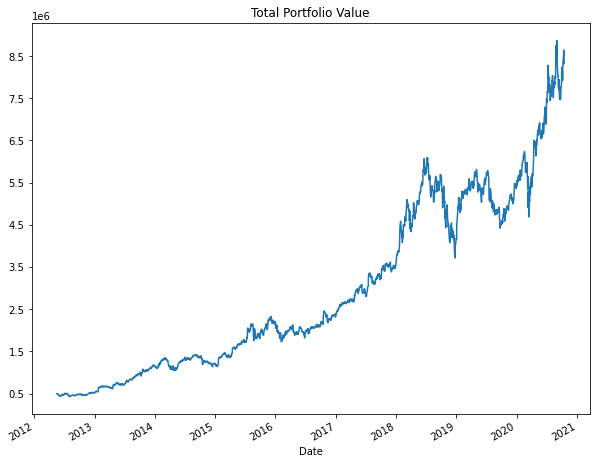

In [75]:
portfolio_example['Total sum'].plot(figsize=(10,8))
plt.yticks(np.arange(500000, 9000000, step=1000000))
plt.title('Total Portfolio Value');

In [76]:
# initial data set
pf_data.head()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-05-18,38.230000,213.850006,16.368652,9.994286,299.078979
2012-05-21,34.029999,218.110001,17.322281,10.248571,305.908386
2012-05-22,31.000000,215.330002,17.189274,9.672857,299.278229
2012-05-23,32.000000,217.279999,17.608683,10.272857,303.592072
2012-05-24,33.029999,215.240005,17.446974,10.038571,300.702881


The normalized value for each stock after the base date/time is the percent of the base price expressed as a whole number. Here, 100 times actual price (any given date) divided by actual base price (initail date). We indiate initail date with iloc[0]. This indicator shows the percentage move in price relative to some fixed starting point ("Normalized price" 2015).

To illustrate, if we want to calculate the normalized price of Facebook("FB") for 5th day, we will devide 5th day (2012-05-18) price which is 33.029999 by base price (2012-05-24) of 38.230000 times 100.

In [21]:
normalized_price.head()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-05-18,100.000000,100.000000,100.000000,100.000000,100.000000
2012-05-21,89.013861,101.992048,105.825944,102.544312,102.283479
2012-05-22,81.088152,100.692072,105.013372,96.783879,100.066621
2012-05-23,83.703898,101.603925,107.575641,102.787304,101.508997
2012-05-24,86.398115,100.649988,106.587723,100.443111,100.542967


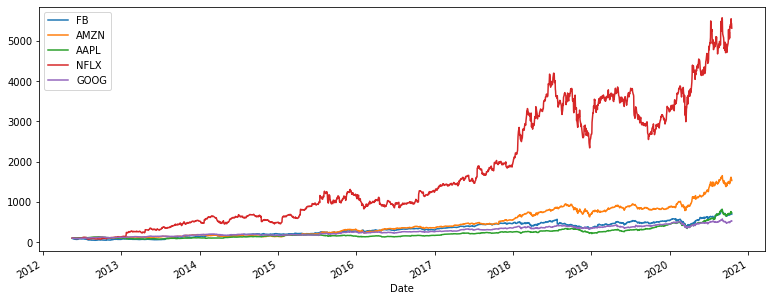

In [18]:
# Normalizing stock prices
normalized_price = pf_data / pf_data.iloc[0] * 100
normalized_price.plot(figsize=(13,5));

### Simple Returns

The simple return of a portfolio is the weighted sum of the simple returns of the constituents of the portfolio. If simple returns are used than the portfolio return is the weighted average of assets in that portfolio. So one of the advantages of simple return is that it can be used where portfolios are formed and portfolio returns have to be calculated because of its asset-additive property.

$ Return = (\text{Ending Price} - \text{Starting Price}) / \text{Starting Price}$

Please note that, we will use simple returns for calculating FAANG portfolio.

### Log Returns

The log return for a time period is the sum of the log returns of partitions of the time period. For example, the log return for a year is the sum of the log returns of the days within the year. Log returns are time-additive, not asset-additive. The weighted average of log returns of individual stocks is not equal to the portfolio return. In fact, log returns are not a linear function of asset weights.

$ Return = log(\text{Ending Price} - \text{Starting Price})$

In [27]:
# Calculating log returns just for the record
log_returns = np.log(pf_data/pf_data.shift(1))
log_returns.tail()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2020-10-12,0.041842,0.046454,0.061585,0.000686,0.034973
2020-10-13,0.001413,0.000203,-0.026886,0.026110,0.001611
2020-10-14,-0.015768,-0.023482,0.000743,-0.023076,-0.002293
2020-10-15,-0.018941,-0.007478,-0.003969,0.000905,-0.005724
2020-10-16,-0.002966,-0.019948,-0.014099,-0.020789,0.008863


In [28]:
# Calculating simple returns of FAANG portfolio
simple_returns = (pf_data / pf_data.shift(1)) - 1
simple_returns.head()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-05-18,NaN,NaN,NaN,NaN,NaN
2012-05-21,-0.109861,0.019920,0.058259,0.025443,0.022835
2012-05-22,-0.089039,-0.012746,-0.007678,-0.056175,-0.021674
2012-05-23,0.032258,0.009056,0.024399,0.062029,0.014414
2012-05-24,0.032187,-0.009389,-0.009183,-0.022806,-0.009517


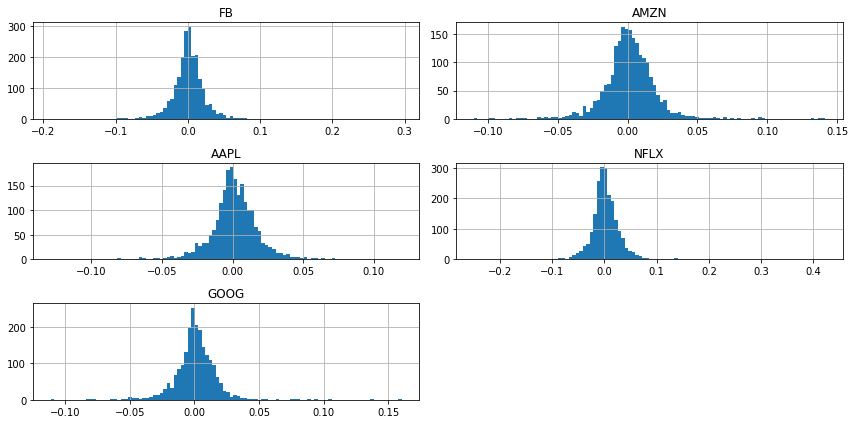

In [29]:
simple_returns.hist(bins=100, figsize=(12,6))
plt.tight_layout()

In [30]:
# Calculating annual simple return from daily simple returns of FAANG portfolio
annual_return = simple_returns.mean() * 250
annual_return

FB      0.297669
AMZN    0.367877
AAPL    0.274847
NFLX    0.580942
GOOG    0.227767
dtype: float64

In [31]:
# Calculating annual covariance from daily simple returns of FAANG portfolio
simple_returns.cov() * 250 # assuming 250 market-days

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.138637,0.049843,0.040729,0.050572,0.046172
AMZN,0.049843,0.091528,0.038020,0.062452,0.046188
AAPL,0.040729,0.038020,0.080710,0.034498,0.037433
NFLX,0.050572,0.062452,0.034498,0.228805,0.048302
GOOG,0.046172,0.046188,0.037433,0.048302,0.063749


In [32]:
simple_returns.corr()

,FB,AMZN,AAPL,NFLX,GOOG
FB,1.000000,0.442475,0.385040,0.283947,0.491131
AMZN,0.442475,1.000000,0.442357,0.431555,0.604662
AAPL,0.385040,0.442357,1.000000,0.253862,0.521862
NFLX,0.283947,0.431555,0.253862,1.000000,0.399935
GOOG,0.491131,0.604662,0.521862,0.399935,1.000000


In [33]:
num_assets = len(assets)
num_assets

5

In [34]:
# Generationg random weights as per number of assets in FAANG Portfolio
weights = np.random.random(num_assets)
weights = weights / np.sum(weights)
# or weights /= np.sum(weights)
weights

array([0.2456221 , 0.06123907, 0.19962106, 0.22211627, 0.2714015 ])

In [35]:
weights[0] + weights[1] + weights[2] + weights[3] + weights[4]

1.0

### Expected Portfolio Return

Expected portfolio return is the weighted average of the expected return of each of its stocks. The basic expected return formula involves multiplying each asset's weight in the portfolio by its expected return, then adding all those figures together.

$ \text{Expected  Portfolio  Return} = \sum_{i=1}^{n}w_i \cdot r_i $

In [36]:
# Expected Portfolio Return
annual_pfolio_retrun = np.sum(weights*simple_returns.mean()) * 250
annual_pfolio_retrun

0.3413610273822441

### Expected Portfolio Variance

Portfolio variance is a measurement of risk, of how the aggregate actual returns of a set of securities making up a portfolio fluctuate over time. This portfolio variance statistic is calculated using the standard deviations of each security in the portfolio as well as the correlations of each security pair in the portfolio. Our target is to minimize expeted portfolio variance while maximizing portfolio returns.

To calculate the portfolio variance of securities in a portfolio, multiply the squared weight of each security by the corresponding variance of the security and add two multiplied by the weighted average of the securities multiplied by the covariance between the securities.

$ \text{Expected Portfolio Variance} = \sum_{i=1}^{n}(w_i^2)Var(r_i) + 2 \cdot \sum_{i=1}^{n}\sum_{j=1}^{n}(w_i)(w_j)Cov(r_i,r_j) $

We will use following notation for matrix calculation, $ (w.V)^2 = w^TV.w$

Something like:

$ (w.V)^2 = [w_1 \dots w_n]
\begin{bmatrix} 
\sigma_{1}^2 & \sigma_{1,2} \dots \sigma_{1,n}\\
\sigma_{2,1} & \sigma_{2}^2 \dots \sigma_{2,n}\\
\vdots&\vdots\ddots\\
\sigma_{n,1} & \sigma_{n,2} \dots \sigma_{n}^2\\
\end{bmatrix} \begin{bmatrix} w_1 \\\vdots\\ w_n\end{bmatrix} $


In [37]:
# Expected Portfolio Variance

# Calculating annual portfolio variance
annual_pfolio_variance = np.dot(weights.T, np.dot(simple_returns.cov()*250,weights))
annual_pfolio_variance

0.06217730814116325

In [38]:
np.sqrt(np.dot(weights.T, np.dot(simple_returns.cov()*250, weights)))

0.24935378108455314

In [39]:
# Calculating annual portfolio standard deviation or volatility
annual_pfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(simple_returns.cov()*250, weights)))
annual_pfolio_volatility

0.24935378108455314

In [40]:
# creating empty arrays
pfolio_returns = []
pfolio_volatilities = []

# Creating loop for appending  portfolio returns and volatilities in arrays
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * simple_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(simple_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

In [41]:
# Converting portfolio returns and portfolio volatilities arrays to a DataFrame
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [42]:
portfolios.tail()

,Return,Volatility
995,0.340330,0.237443
996,0.400187,0.278883
997,0.330155,0.253871
998,0.324525,0.235160
999,0.339046,0.245086


## Efficient Frontier
The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.

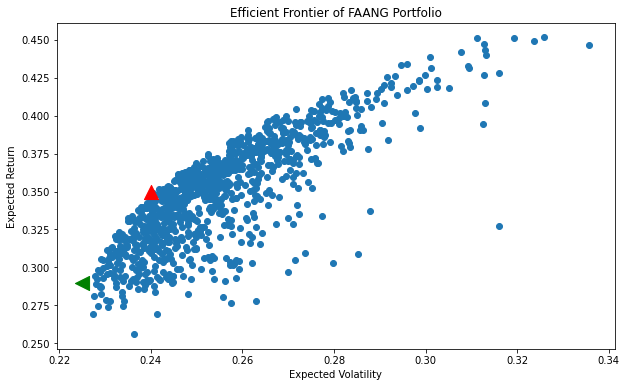

In [99]:
# Efficient frontier

# Ploting Efficient Frontier of FAANG portfolio
plt.figure(figsize=(10, 6))
plt.scatter(x=portfolios['Volatility'], y=portfolios['Return'], cmap='Spectral')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier of FAANG Portfolio')
plt.scatter(0.24, 0.35, marker='^',color='r', s=200)
plt.scatter(0.225, 0.29, marker='<',color='g', s=200)
plt.show()

## Sharpe Ratio

The Sharpe ratio was developed by Nobel laureate William F. Sharpe and is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. 

$$ Sharpe Ratio = \frac{r_p - r_f}{ \sigma_p}$$

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

* Daily = sqrt(252) 
* Weekly = sqrt(52)
* Monthly = sqrt(12)

In [95]:
# Calculation Sharpe Ratio
# Considering risk free rate (10 Year Treasury Rate of October 17, 2020) is 0.76%. 
# For more info, refer to 'https://ycharts.com/indicators/10_year_treasury_rate'

risk_free_rate = 0.0082
sharpe_ratio = (annual_pfolio_retrun - risk_free_rate) / annual_pfolio_volatility
sharpe_ratio

1.3856353398897123

It is possible to draw an upward sloping curve to connect all of the most efficient portfolios. This curve is called **the efficient frontier**. Investing in a portfolio underneath the curve is not desirable because it does not maximize returns for a given level of risk.

![](https://raw.githubusercontent.com/ceastIU/Quantitative-Finance-Algorithmic-Trading-in-Python/2c72b82577b3681b7b77f04ce55589e2082854c0/jupyter/images/efficientfrontier.png)

**Benefits of MPT**

MPT is a useful tool for investors trying to build **diversified** portfolios. In fact, the growth of exchange traded funds (ETFs) made MPT more relevant by giving investors **easier access to different asset classes**. Stock investors can use MPT to **reduce risk by putting a small portion of their portfolios in government bond ETFs**. The variance of the portfolio will be significantly lower because government bonds have a negative correlation with stocks. 
MPT can be used to **reduce the volatility of a U.S. Treasury portfolio by putting 10% in a small-cap value index fund or ETF** to get through the losses from inflation . 

**Critisism of MPT**

Perhaps the most serious criticism of MPT is that it evaluates portfolios based on variance rather than downside risk. Two portfolios that have the same level of variance and returns are considered equally desirable under modern portfolio theory. One portfolio may have that variance because of frequent small losses. In contrast, the other could have that variance because of rare spectacular declines. Most investors would prefer frequent small losses, which would be easier to endure. Post-modern portfolio theory (PMPT) attempts to improve on modern portfolio theory by minimizing downside risk instead of variance. 

**Sources**:

0. Markowitz, H. (1952). Portfolio Selection. In: Journal of Finance 7.1, S. 77–91.
1. [Investopedia. Modern Portfolio Theory (MPT)](https://www.investopedia.com/terms/m/modernportfoliotheory.asp)
2. [Investopedia. Example of Applying Modern Portfolio Theory (MPS)](https://www.investopedia.com/articles/company-insights/083016/example-applying-modern-portfolio-theory-mps.asp)
3. [John M. Kulik. A Practical Application of Modern Portfolio Theory to Capital
Allocation](http://docshare02.docshare.tips/files/10897/108973379.pdf)
4. [JÖNKÖPING INTERNATIONAL BUSINESS SCHOOL. Practical Application of
Modern Portfolio Theory](https://www.diva-portal.org/smash/get/diva2:4384/fulltext01.pdf)
5. [What is Wrong with Modern Portfolio Theory](https://www.youtube.com/watch?v=PyCjybwEXpI&ab_channel=MoneyFortheRestofUs)

Recommendations:

[Python library investpy](https://pypi.org/project/investpy/)